In [51]:
'''
Load data
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',20)
players_df = pd.read_csv('data/nba-enhanced-stats/2017-18_playerBoxScore.csv')
team_df = pd.read_csv('data/nba-enhanced-stats/2017-18_teamBoxScore.csv')

print('\n\nThe dimension of players df is:',players_df.shape)
players_df.head(1)

Populating the interactive namespace from numpy and matplotlib


The dimension of players df is: (26109, 51)


,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamDayOff,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2017-10-17,08:00,Regular,Brown,Jaylen,BOS,East,Atlantic,Away,Loss,0,Forte,Brian,Smith,Michael,McCutchen,Monty,Jaylen Brown,Starter,40,F,79,222,1996-10-24,25,0,3,3,0,5,23,11,0.4783,14,9,0.6429,9,2,0.2222,2,1,0.5,1,5,6,CLE,East,Central,Home,Win,0


In [52]:
print('The dimension of team df is:',team_df.shape)
team_df.head(1)

The dimension of team df is: (2460, 123)


,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,...,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,241,0,99,24,12,11,4,24,88,36,0.4091,56,28,0.5,32,8,0.25,25,19,0.76,9,37,46,19,19,33,28,0,0,0,0,47.9167,66.6667,0.5,0.4545,18.0,...,19,17,3,4,25,83,38,0.4578,61,33,0.541,22,5,0.2273,25,21,0.84,9,41,50,29,25,18,30,0,0,0,0,52.0833,50.0,0.5426,0.488,18.0,82.0,15.3153,2.9916,3.9888,6.5574,1.2289,66.625,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648


In [59]:
'''
Filter & Clean Data:
    Filter data to only include teams for playoffs matches
    Deal with NA
    Output data
'''

# Filter data to only include teams for playoffs matches
playoffs_team = ['TOR','BOS','PHI','CLE','IND','MIA','MIL','WAS','HOU','GS','POR','OKC','UTA',
                'NO','SAC','MIN']

players_playoffs_df = players_df[players_df['teamAbbr'].isin(playoffs_team)]
team_playoffs_df = team_df[team_df['teamAbbr'].isin(playoffs_team)]

# Compute numbers of value with na
na_play = players_playoffs_df.isna().sum()
print ('na information for players:\n',na_play[na_play>0])

# Remove columns with na, here are offLNm3 and offFNm3 (not important features)
na_play = na_play[na_play>0].index.tolist()
players_playoffs_df.drop(columns = na_play,inplace= True)
print('The new dimension of players df is:',players_playoffs_df.shape)

# Compute numbers of value with na
na_team = team_playoffs_df.isna().sum()
print('\n na information for teams:\n',na_team[na_team>0])

# Remove columns with na, here are offLNm3 and offFNm3 (not important features)
na_team = na_team[na_team>0].index.tolist()
team_playoffs_df.drop(columns = na_team,inplace= True)
print('The new dimension of teams df is:',team_playoffs_df.shape)

# Ouput these two df
players_playoffs_df.to_csv('players_stat.csv')
team_playoffs_df.to_csv('teams_stat.csv')

na information for players:
 offLNm3    20
offFNm3    20
dtype: int64
The new dimension of players df is: (13844, 49)

 na information for teams:
 offLNm3    2
offFNm3    2
dtype: int64
The new dimension of teams df is: (1312, 121)


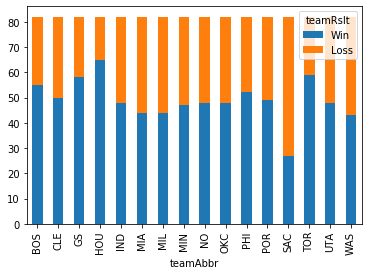

In [58]:
'''
Simply data visualizations:
    Stacked plot to show numbers of win and loss for teams
    
'''

# Stacked plot to show numbers of win and loss for teams
wl_df = team_playoffs_df.groupby(['teamAbbr','teamRslt'])['teamAbbr'].count().unstack('teamRslt')
wl_df[['Win','Loss']].plot(kind='bar', stacked=True)

In [ ]:
playoffs_team = ['TOR','BOS','PHI','CLE','IND','MIA','MIL','WAS','HOU','GS','POR','OKC','UTA',
                'NO','SAC','MIN']
